# Employee Churn Prediction 

#### Problem Statement : Employee churn is defined as departure of a resource/asset from an organization. 

Employee Churn or attrition is a curse for businesses because the  cost of hiring a new employee is much greater than the cost of retention. Some costs are tangible but what happens if a productive employee leaves company? The loss is much greater beacuse the company suffers lack of innovative ideas, management styles etc. 

#### How does ML help ? 

The problem is somewhat similar to customer churn prediction where we predict the odds of a customer leaving the company. ML helps to go beyond intution and identify the probability of an employee leaving so that HR department can take necessary actions to retain the employee.


#### Dataset : 

This is a fictional dataset created by IBM Data Scientists. Here is the link to download the dataset : https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset


#### Exploratory Data Analysis 

#### 1. Import necessary modules


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import xgboost as xgb
import shap
shap.initjs()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### 2. Loading the dataset

In [2]:
data = pd.read_csv('Data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

From this we can conclude that we have 1470 rows, 35 columns and no missing values( the data is already clean. Kudos to the data curators!)

Let's get a look of our columns to identify which columns are categorical 

In [4]:
uniqueValues = data.nunique()
print("No. of unique values in each column are ")
print(uniqueValues)

No. of unique values in each column are 
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
Tr

So we will treat all columns which have atmost 10 unique values and are of object type as categorical and drop the columns which have a constant value throughout.

In [5]:
# Categorical features
cat_cols = ['Gender', 'PerformanceRating', 
            'OverTime', 'MaritalStatus', 'Department', 'BusinessTravel', 'StockOptionLevel', 
            'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 
            'RelationshipSatisfaction', 'WorkLifeBalance', 'Education', 
            'JobLevel', 'EducationField', 'TrainingTimesLastYear', 
            'JobRole', 'NumCompaniesWorked']

# constant features
const_feat = ['EmployeeCount',  'Over18',  'StandardHours'   ]

data.drop(const_feat,axis=1, inplace=True)

#### 4. Visualizing various features

#### a. Attrition

Here is the percentage distribution of Attrition 
No     84.0
Yes    16.0
Name: Attrition, dtype: float64 2


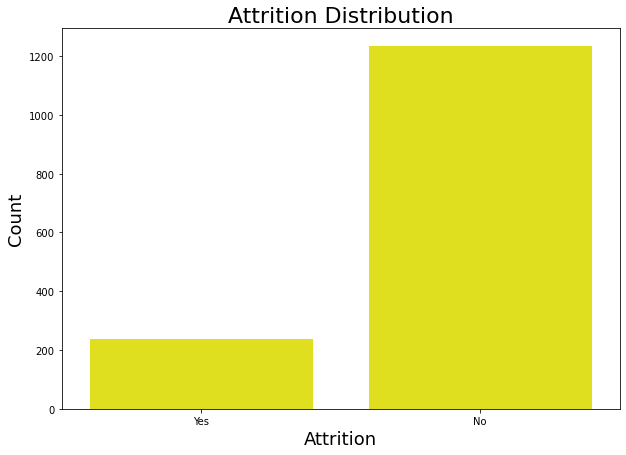

In [6]:
print("Here is the percentage distribution of Attrition ")
print(round((data['Attrition'].value_counts()/data['Attrition'].count())*100),2)

plt.figure(figsize=(10,7))

g1 = sns.countplot(x=data["Attrition"], color='yellow')
g1.set_title("Attrition Distribution", fontsize=22)
g1.set_ylabel('Count', fontsize=18)
g1.set_xlabel('Attrition', fontsize=18)

plt.show()

The graph shows some skew with 'No' values almost about the five times of 'Yes'values

Let's look at the distribution of each feature with respect to the target variable which is Attrition

#### b. Categorical features with atmost 10 unique values.

<Figure size 720x504 with 0 Axes>

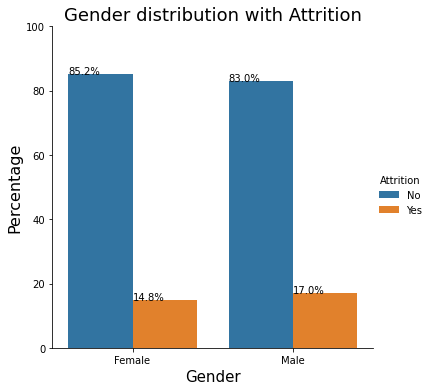

<Figure size 720x504 with 0 Axes>

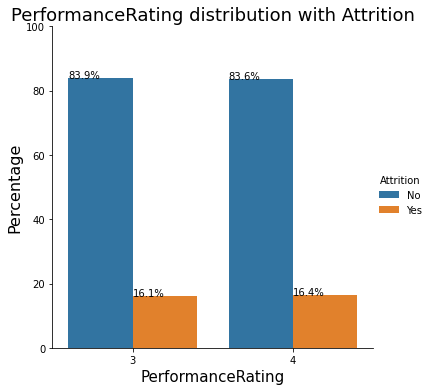

<Figure size 720x504 with 0 Axes>

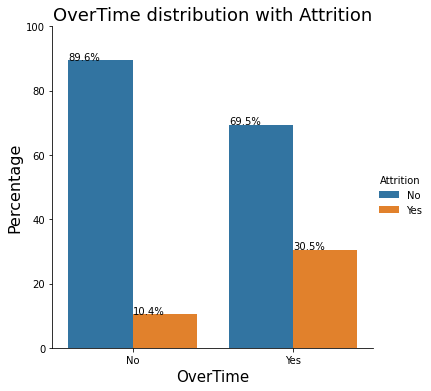

<Figure size 720x504 with 0 Axes>

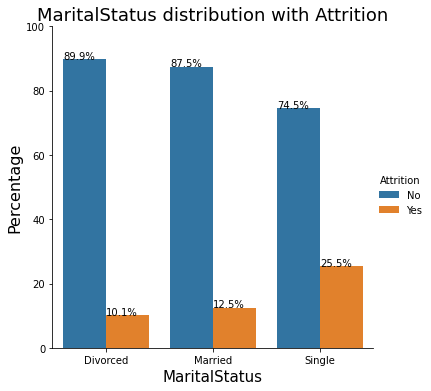

<Figure size 720x504 with 0 Axes>

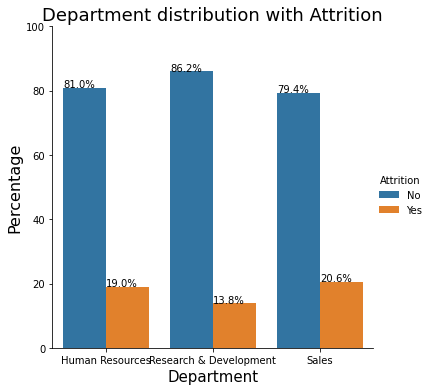

<Figure size 720x504 with 0 Axes>

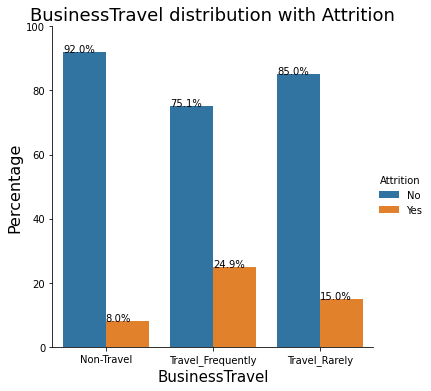

<Figure size 720x504 with 0 Axes>

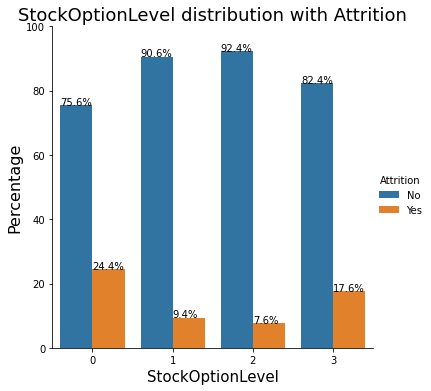

<Figure size 720x504 with 0 Axes>

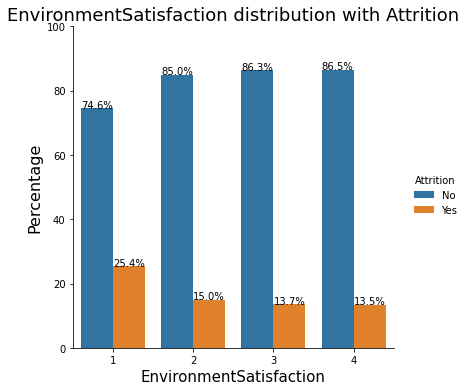

<Figure size 720x504 with 0 Axes>

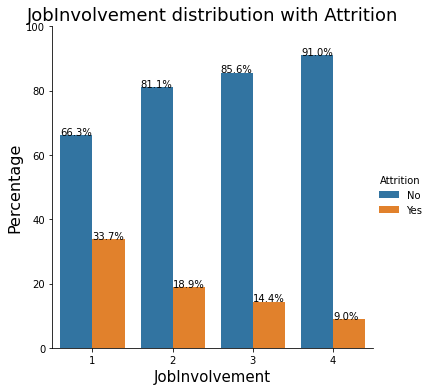

<Figure size 720x504 with 0 Axes>

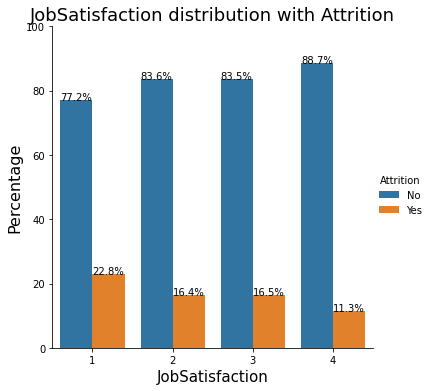

<Figure size 720x504 with 0 Axes>

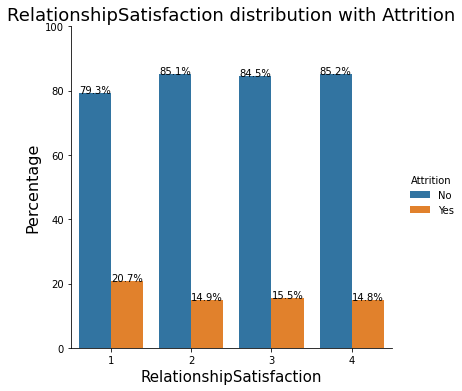

<Figure size 720x504 with 0 Axes>

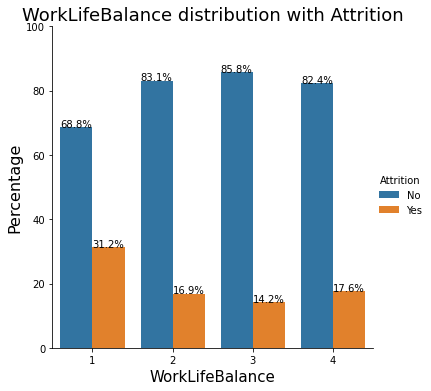

<Figure size 720x504 with 0 Axes>

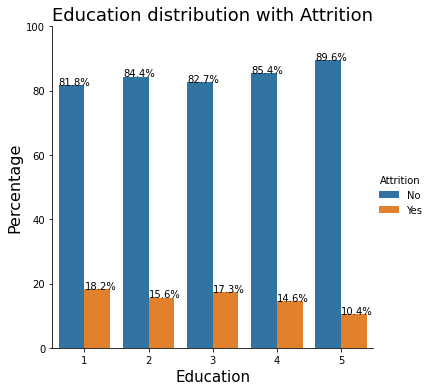

<Figure size 720x504 with 0 Axes>

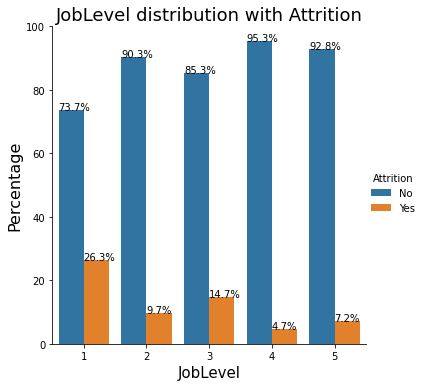

<Figure size 720x504 with 0 Axes>

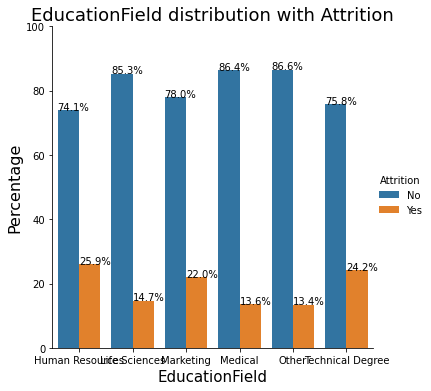

<Figure size 720x504 with 0 Axes>

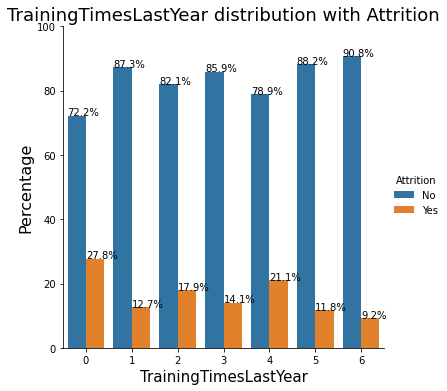

<Figure size 720x504 with 0 Axes>

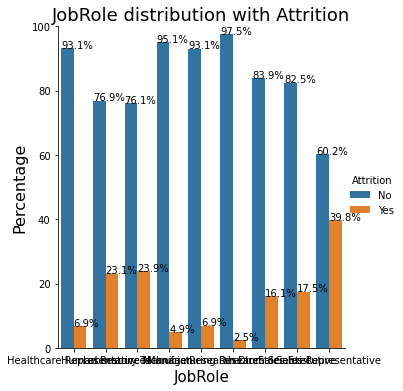

<Figure size 720x504 with 0 Axes>

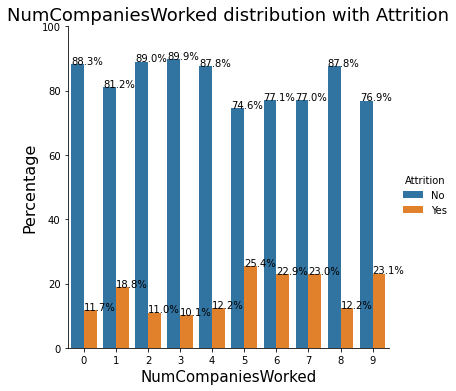

In [7]:
for col in cat_cols:
    plt.figure(figsize=(10,7))
    temp_df = data.groupby(col)['Attrition'].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('Percent').reset_index()
    g = sns.catplot(x=col, y='Percent', hue='Attrition', kind='bar', data=temp_df)
    g.ax.set_ylim(0,100)
    g.ax.set_title(f'{col} distribution with Attrition', fontsize=18)
    g.ax.set_ylabel('Percentage', fontsize=16)
    g.ax.set_xlabel( f'{col}', fontsize=15)
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)

Insights drawn: 
1. Employees that travel frequently for business purposes have more attrition rate.
2. There is not much difference in the attrition rate of both the genders.
3. Sales Department has the highest churn rate among all the three departments.
4. Lesser the environmental satisfaction more are the odds of an employee quitting the organization.
5. Attrition rate is least among the employees with less job involvement rating.
6. Singles tend to switch organization most frequently.
7. Overtime also contributes to higher churn rate.
8. If there were no trainings last year for an employee the she/he is likely to churn. 

#### c. Age 

Text(0, 0.5, 'Probability')

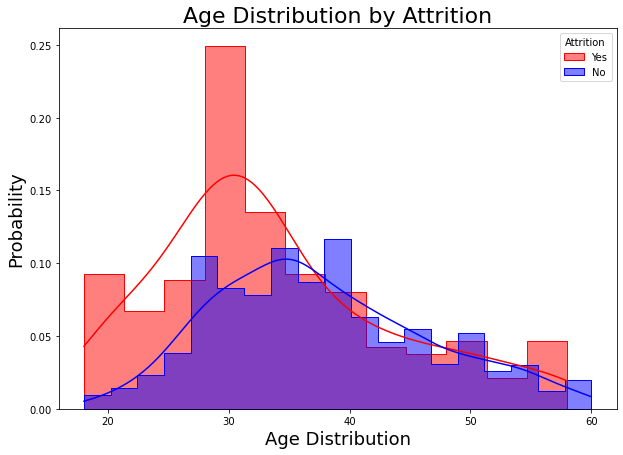

In [8]:
plt.figure(figsize=(10,7))
g = sns.histplot(data[data['Attrition'] == 'Yes']['Age'], label='Yes', stat='probability', color='red', kde=True, thresh=0.8, element='step')
g = sns.histplot(data[data['Attrition'] == 'No']['Age'], label="No", stat='probability', color='blue', kde=True, thresh=0.8, element='step')
g.legend(title='Attrition')
g.set_title("Age Distribution by Attrition", fontsize=22)
g.set_xlabel("Age Distribution", fontsize=18)
g.set_ylabel("Probability", fontsize=18)

Clearly younger people have higher tendency to quit then older people which makes sense.  

#### d. distance from home

Text(0, 0.5, 'Density')

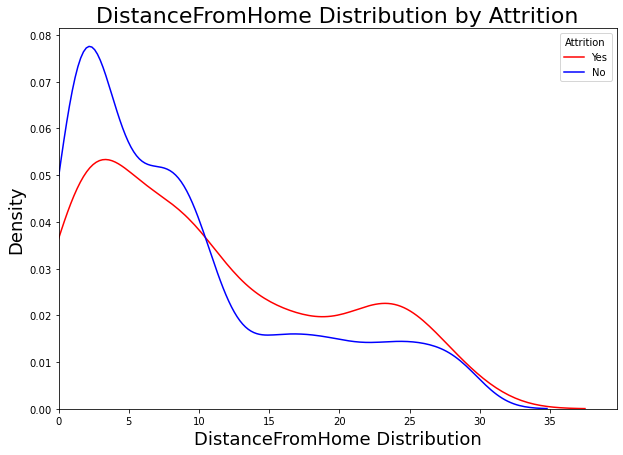

In [9]:
plt.figure(figsize=(10,7))
g = sns.kdeplot(data[data['Attrition'] == 'Yes']['DistanceFromHome'], label='Yes',  color='red')
g = sns.kdeplot(data[data['Attrition'] == 'No']['DistanceFromHome'], label="No", color='blue')
g.legend(title='Attrition')
g.set_title("DistanceFromHome Distribution by Attrition", fontsize=22)
g.set_xlim(left=0)
g.set_xlabel("DistanceFromHome Distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

Clearly the attrition rate is higher for employees who have to traverse long distance for work

#### e. YearsAtCompany

Text(0, 0.5, 'Density')

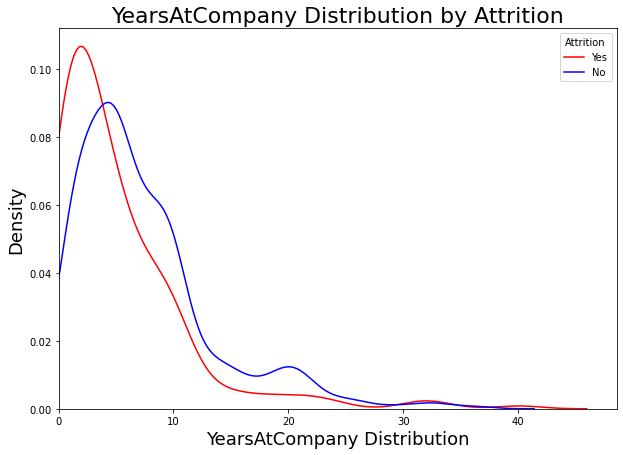

In [10]:
plt.figure(figsize=(10,7))
g = sns.kdeplot(data[data['Attrition'] == 'Yes']['YearsAtCompany'], label='Yes',  color='red')
g = sns.kdeplot(data[data['Attrition'] == 'No']['YearsAtCompany'], label="No", color='blue')
g.legend(title='Attrition')
g.set_title("YearsAtCompany Distribution by Attrition", fontsize=22)
g.set_xlim(left=0)
g.set_xlabel("YearsAtCompany Distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

If the tenure of an employee is more than 5 years then he/she is likely to stay.

#### f. YearsInCurrentRole

Text(0, 0.5, 'Density')

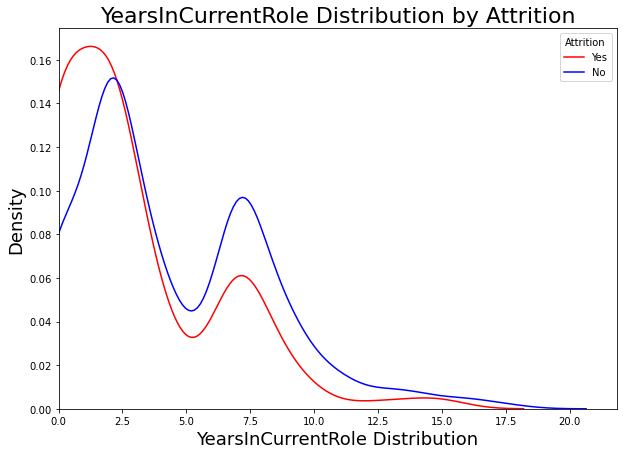

In [11]:
plt.figure(figsize=(10,7))
g = sns.kdeplot(data[data['Attrition'] == 'Yes']['YearsInCurrentRole'], label='Yes',  color='red')
g = sns.kdeplot(data[data['Attrition'] == 'No']['YearsInCurrentRole'], label="No", color='blue')
g.legend(title='Attrition')
g.set_title("YearsInCurrentRole Distribution by Attrition", fontsize=22)
g.set_xlim(left=0)
g.set_xlabel("YearsInCurrentRole Distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

Clearly if the years in current role is greater than 5 then the chances of attrition are less.

#### g. TotalWorkingYears

Text(0, 0.5, 'Density')

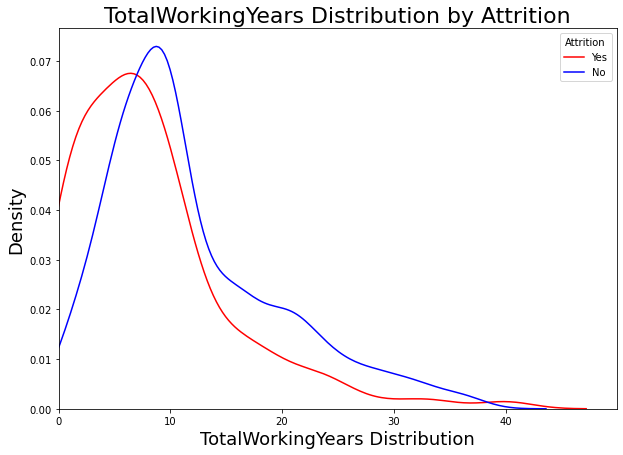

In [12]:
plt.figure(figsize=(10,7))
g = sns.kdeplot(data[data['Attrition'] == 'Yes']['TotalWorkingYears'], label='Yes',  color='red')
g = sns.kdeplot(data[data['Attrition'] == 'No']['TotalWorkingYears'], label="No", color='blue')
g.legend(title='Attrition')
g.set_title("TotalWorkingYears Distribution by Attrition", fontsize=22)
g.set_xlim(left=0)
g.set_xlabel("TotalWorkingYears Distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

Employees are likely to churn in the initial years of their career. 

#### h. MonthlyIncome

Text(0, 0.5, 'Density')

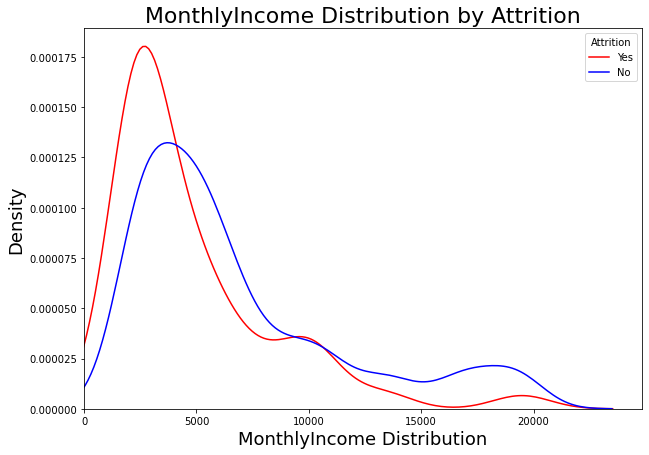

In [13]:
plt.figure(figsize=(10,7))
g = sns.kdeplot(data[data['Attrition'] == 'Yes']['MonthlyIncome'], label='Yes',  color='red')
g = sns.kdeplot(data[data['Attrition'] == 'No']['MonthlyIncome'], label="No", color='blue')
g.legend(title='Attrition')
g.set_title("MonthlyIncome Distribution by Attrition", fontsize=22)
g.set_xlim(left=0)
g.set_xlabel("MonthlyIncome Distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

If the monthly income is greater than 10000 then attrition is less likely to happen

#### i. PercentSalaryHike

Text(0, 0.5, 'Density')

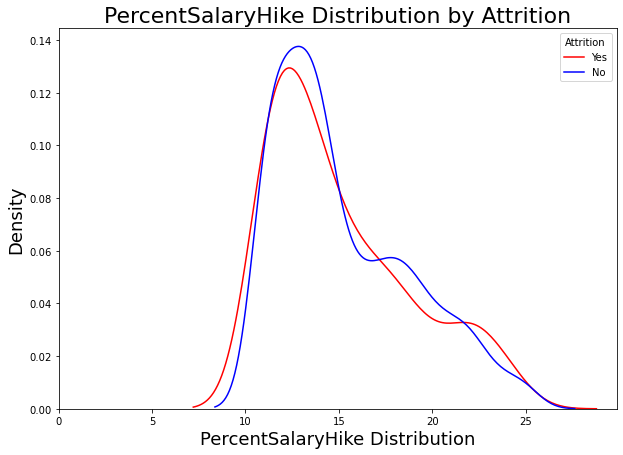

In [14]:
plt.figure(figsize=(10,7))
g = sns.kdeplot(data[data['Attrition'] == 'Yes']['PercentSalaryHike'], label='Yes',  color='red')
g = sns.kdeplot(data[data['Attrition'] == 'No']['PercentSalaryHike'], label="No", color='blue')
g.legend(title='Attrition')
g.set_title("PercentSalaryHike Distribution by Attrition", fontsize=22)
g.set_xlim(left=0)
g.set_xlabel("PercentSalaryHike Distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

No clear pattern observed

#### 5. Pre-Processing Pipeline

#### a. Encoding categorical variables 

In [15]:
le = LabelEncoder()
nom_cats = ['BusinessTravel', 'Attrition','Gender','OverTime', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
data[nom_cats] = data[nom_cats].apply(lambda col: le.fit_transform(col))

data.drop('EmployeeNumber',axis=1,inplace=True)

In [16]:
data[nom_cats] 

,BusinessTravel,Attrition,Gender,OverTime,Department,EducationField,JobRole,MaritalStatus
0,2,1,0,1,2,1,7,2
1,1,0,1,0,1,1,6,1
2,2,1,1,1,1,4,2,2
3,1,0,0,1,1,1,6,1
4,2,0,1,0,1,3,2,1
...,...,...,...,...,...,...,...,...
1465,1,0,1,0,1,3,2,1
1466,2,0,1,0,1,3,0,1
1467,2,0,1,1,1,1,4,1
1468,1,0,1,0,2,3,7,1


#### b. Train-test Split

In [17]:
X_train, X_val, y_train, y_val = train_test_split(data.drop('Attrition', axis=1), data['Attrition'], test_size=.2, stratify=data['Attrition'])

#### 6. Model Training

In [19]:
params = {
    'booster': 'gbtree', 
    'objective': 'binary:logistic',
    'subsample': 0.8,
    'colsample_bytree':1, 
    'eta': 0.05,
    'max_depth':5,
    'subsample':0.8,
    'eval_metric': 'auc',
    'scale_pos_weight':5.25,
    'seed':24} 

dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_val,y_val)


watchlist = [(dtrain, 'train')]

xgb_model = xgb.train(params, dtrain,22,evals= watchlist,verbose_eval=True)

[0]	train-auc:0.83265
[1]	train-auc:0.89019
[2]	train-auc:0.91616
[3]	train-auc:0.92186
[4]	train-auc:0.93566
[5]	train-auc:0.94138
[6]	train-auc:0.94357
[7]	train-auc:0.94759
[8]	train-auc:0.95234
[9]	train-auc:0.95370
[10]	train-auc:0.95649
[11]	train-auc:0.95633
[12]	train-auc:0.95851
[13]	train-auc:0.96095
[14]	train-auc:0.96386
[15]	train-auc:0.96388
[16]	train-auc:0.96593
[17]	train-auc:0.96704
[18]	train-auc:0.96924
[19]	train-auc:0.96946
[20]	train-auc:0.97114
[21]	train-auc:0.97238


In [20]:
pred_x = xgb_model.predict(dvalid)

#### 7. Confusion Matrix


In [22]:
confusion_matrix(y_val, np.rint(pred_x))

array([[217,  30],
       [ 21,  26]])

#### 8. Explanaibilty with Shap

In [23]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

#### 8.a.  Sumary Plot — Global Interpretability

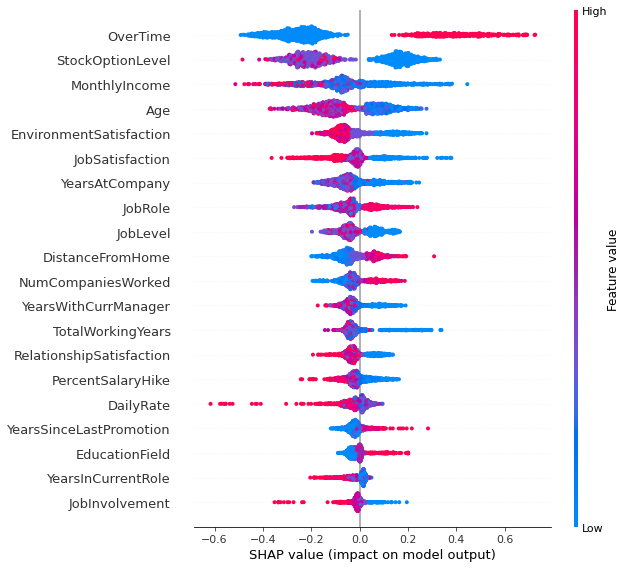

In [24]:
shap.summary_plot(shap_values, X_train)

This plot shows all the data points in training data. Following can be concluded from this plot.

1. The graph displays important features in descending order. Most important features are the top.

2. The poistion of a point is associated with the impact of that particular value on the model.

3. Red colour indicates a higher value and blue indicates lower value. 

4. For eg: it can be concluded that a higher value(red colour) of overtime has a positive impact on the model. 

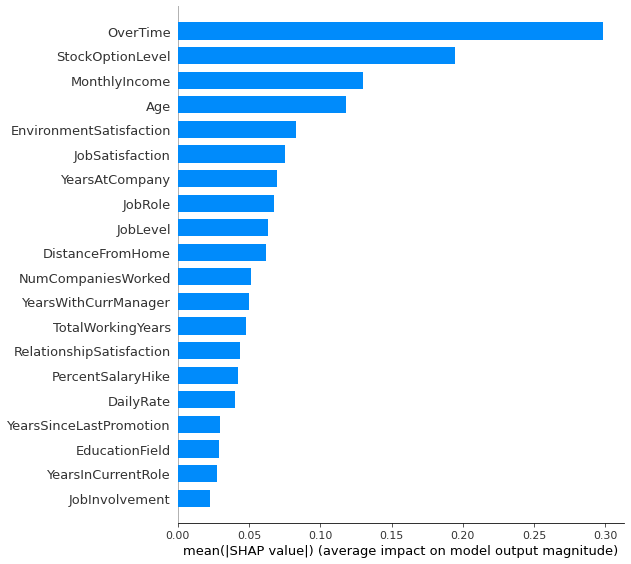

In [25]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

#### 8.b Dependence Plot — Global Interpretability

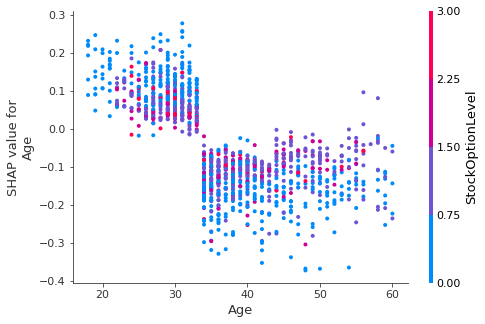

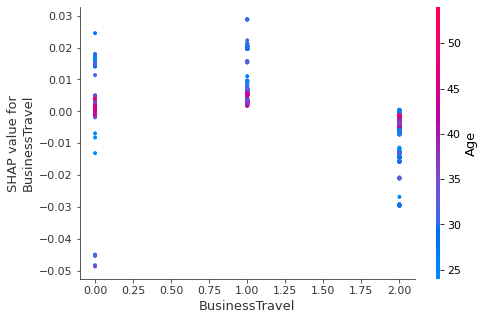

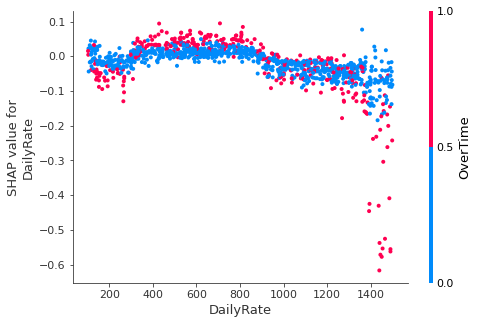

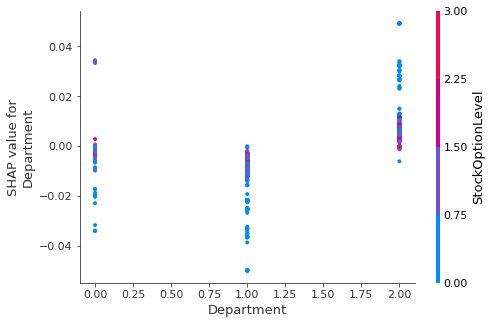

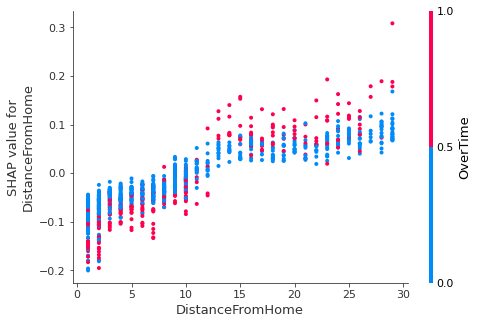

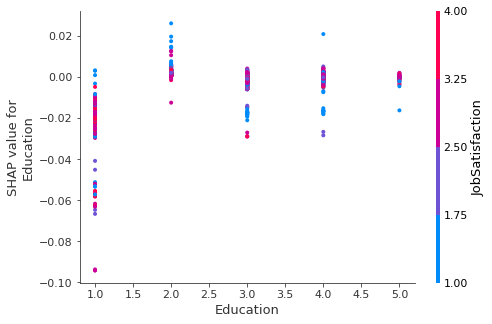

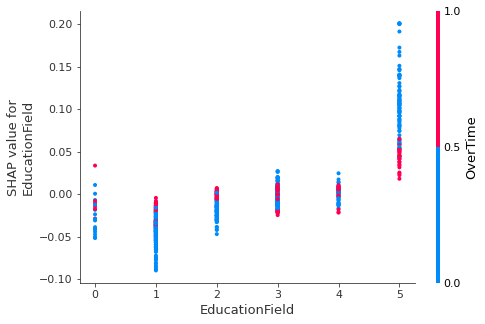

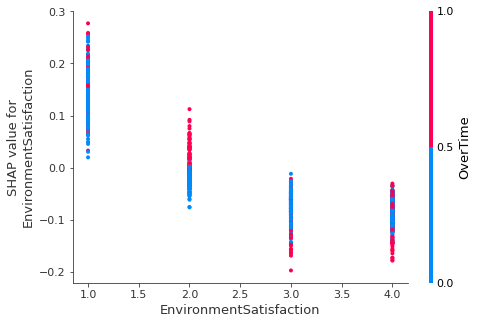

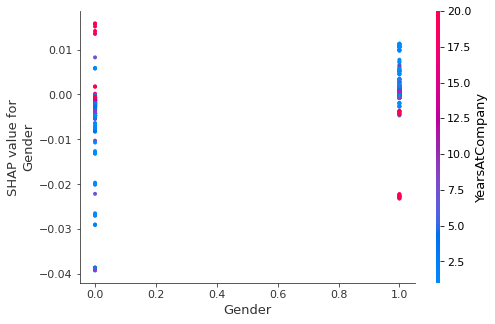

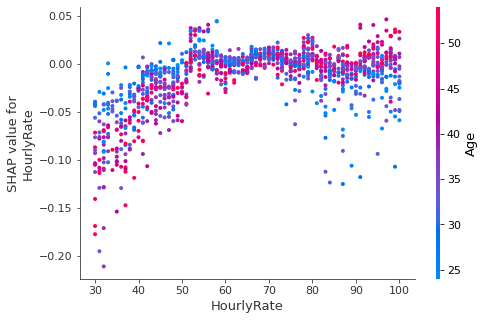

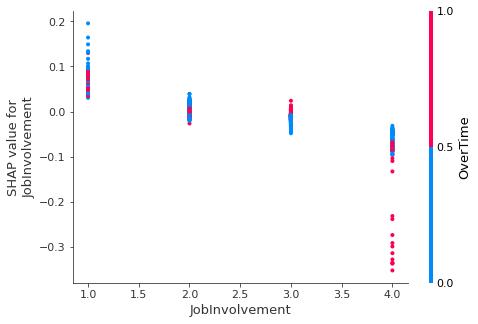

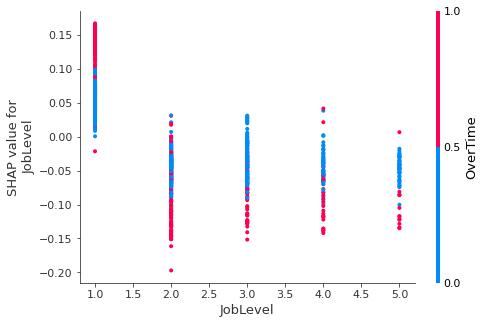

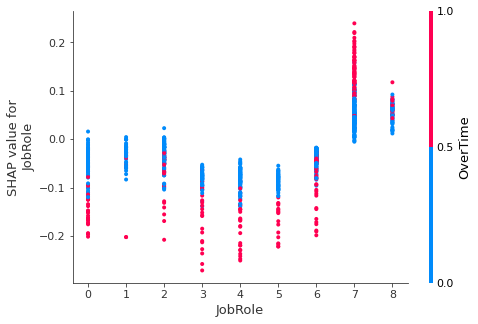

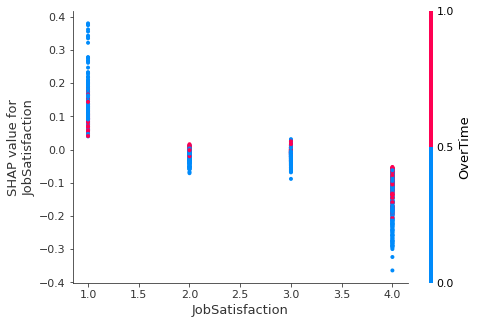

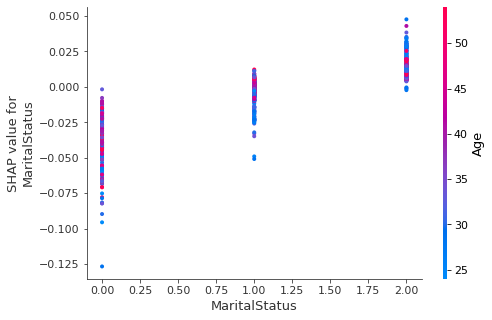

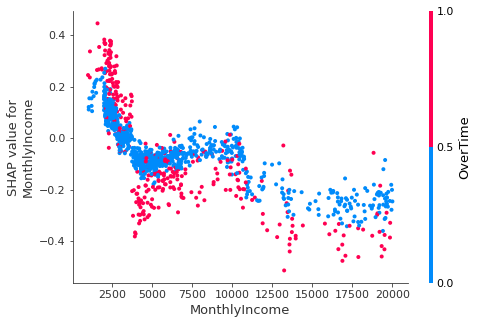

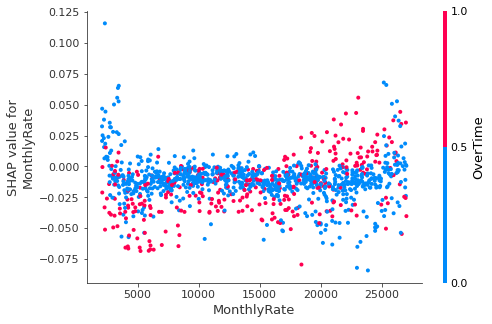

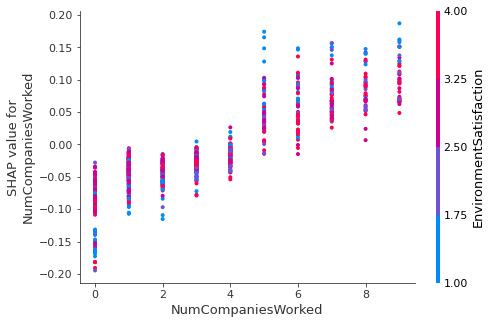

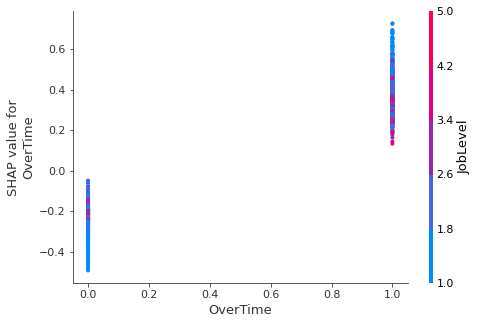

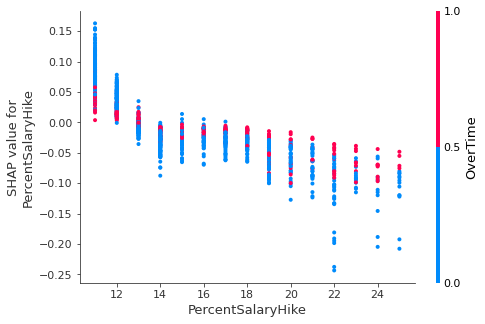

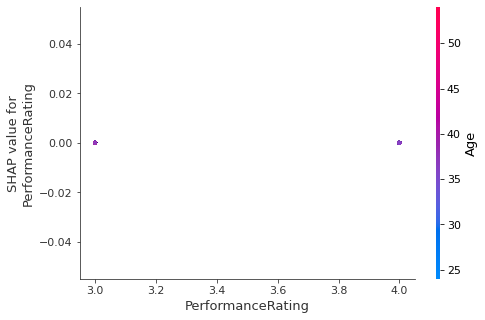

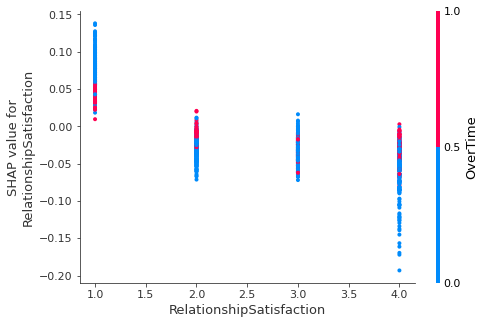

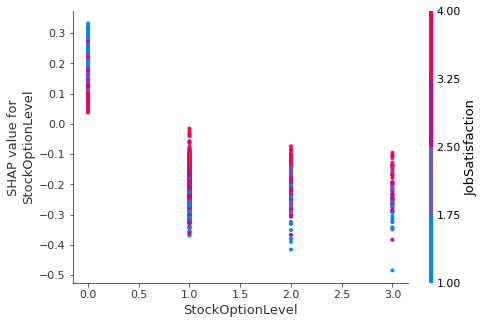

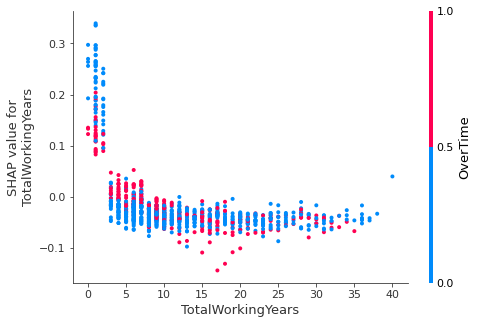

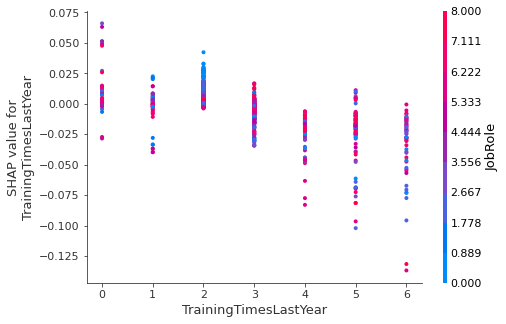

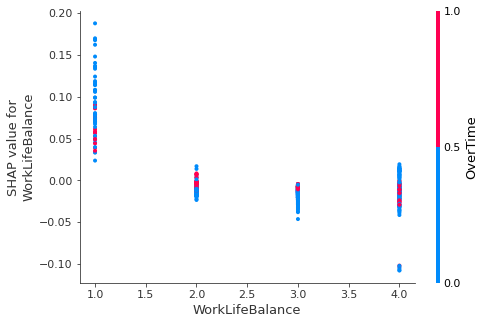

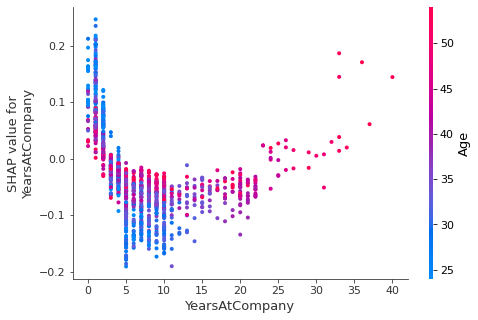

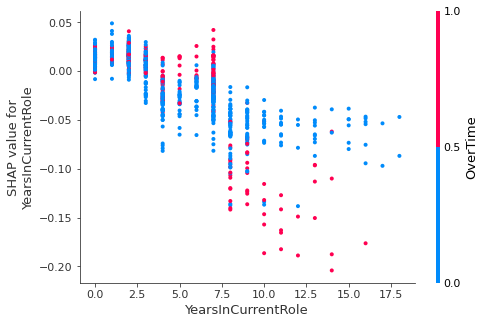

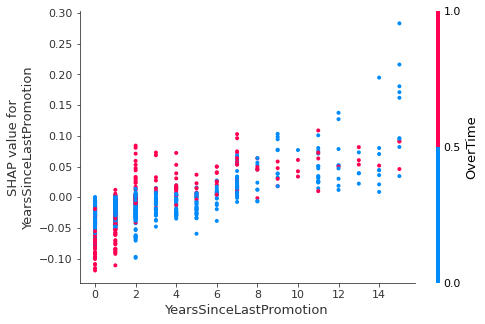

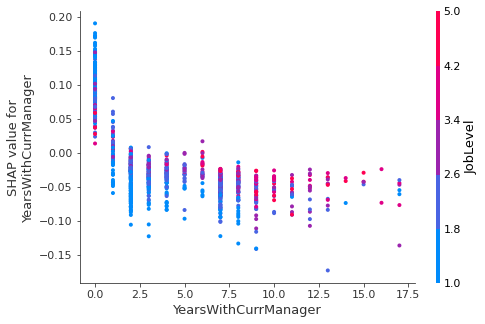

In [26]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train)

Dependence plot

A dependence plot is a scatter plot that shows the relationshiop between two fetures and it's impact on the model. 

1.Each dot is a single row from the dataset.

2.The x-axis is the value of the feature.

3.The y-axis is the SHAP value for that feature, which is representative of the effect a feature can make on model's output. 

4.The color corresponds to a second feature that may have an interaction effect with the feature we are plotting (by default this second feature is chosen automatically).

#### 8.c Individual SHAP Value Plot — Local Interpretability

In [27]:
X_output = X_val.copy()
X_output.loc[:,'predict'] = np.round(xgb_model.predict(xgb.DMatrix(X_val, y_val)),2)

In [99]:
X_output

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,predict
812,43,1,1082,1,27,3,1,3,0,83,...,3,1,18,1,3,8,7,0,1,0.32
959,40,2,523,1,2,3,1,3,1,98,...,3,0,9,4,3,9,8,8,8,0.25
185,33,2,931,1,14,3,3,4,0,72,...,4,1,8,5,3,8,7,1,6,0.22
1100,35,2,1402,2,28,4,1,2,0,98,...,1,2,6,5,3,5,3,4,2,0.27
270,55,2,452,1,1,3,3,4,1,81,...,3,0,37,2,3,36,10,4,13,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,30,2,1427,1,2,1,3,2,1,35,...,4,0,6,3,3,5,3,1,2,0.27
88,30,2,288,1,2,3,1,3,1,99,...,1,3,11,3,3,11,10,10,8,0.28
328,33,1,508,2,10,3,2,2,1,46,...,3,0,9,6,2,7,7,0,1,0.36
1409,40,1,692,1,11,3,5,4,0,73,...,1,1,10,2,4,10,9,9,4,0.39


In [88]:
def get_explanantions(i):
    explainerModel2 = shap.TreeExplainer(xgb_model,feature_dependence='independent', model_output='probability', data=X_val)
    shap_values_Model2 = explainerModel2.shap_values(X_val)
    p=shap.force_plot(explainerModel2.expected_value, shap_values_Model2[i], X_val.iloc[[i]])
    return p

In [90]:
get_explanantions(2)

Understanding the plot:-

1. The value in the bold (0.22) is the output value predicted by the model. 

2. The base value is the avg. value of prediction. 

3. The features in red are responsible for the higher output value while the ones in blue contribute to lower value.

4. Overtime is 0 therefore the chances are low that the employee will leave the compan. Similarly the StockOptionValue is 1, thus lower value of output.


In [94]:
get_explanantions(212)

The probability is high here majorly due to Age, Stockotionlevel and TotalWorkingYears